<a href="https://colab.research.google.com/github/solankinitin1210/Capstone-Project-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

## <b> Problem Description </b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).


## <b> Data Description </b>

### <b>  The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>


### <b>Attribute Information: </b>

## Demographic
* ### Sex : male or female("M" or "F")
* ### Age: Age of the patient (Continuous)

## Behavioral
* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* ### Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(Continuous)
* ### BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* ### Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* ### Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* ### Diabetes: whether or not the patient had diabetes (Nominal)
* ### Tot Chol: total cholesterol level (Continuous)
* ### Sys BP: systolic blood pressure (Continuous)
* ### BMI: Body Mass Index (Continuous)
* ### Heart Rate: heart rate (Continuous)
* ### Glucose: glucose level (Continuous)

## Predict variable (desired target)
* ### 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)


In [141]:
# Importing the libraries for process data
import pandas as pd
import numpy as np
from numpy import math

# Import libraries for ploting data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split

In [ ]:
# Mount driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import CSV file from drive 
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project-3/data_cardiovascular_risk.csv')

In [ ]:
# Let's check how our dataset look like
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Let's checke the null values for all the columns
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Let's check the statistics of columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


**Initial Observation**

## Clean the Dataset and Deal With the Null Values

### id & education column
- Id columns do not contain any useful information so it's not required for our analysis
- As we know that heart disease has relation to education, so the education column is again not required in analysis (even in the given PDF document this column is not mentioned)
- So let's drop both id and education columns

In [ ]:
# droping the id and education column
df.drop(columns=['id','education'],inplace=True)

In [ ]:
# Make function to plot distribution chart
def dist_chart(x):
  plt.figure(figsize = (20,40))
  plt.subplot(9,2,1)
  sns.distplot(x)
  plt.axvline(x.mean(), color='green', linestyle='dashed', linewidth=2)
  plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.subplot(9,2,2)
  sns.boxplot(x)
  plt.show()

### cigsPerDay

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


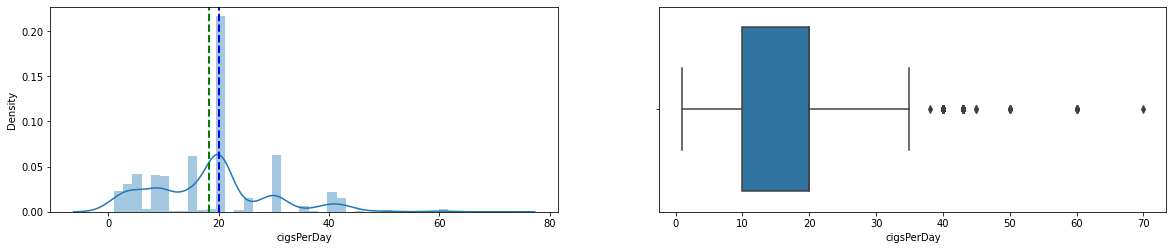

In [ ]:
# Plot the Data distribution chart for column
dist_chart(df[df['is_smoking']=='YES'].cigsPerDay)

**Observation**
- From the chart, it's observed that Data is normally distributed (not counting the non-smoker's value as it's 0) 
- Mean and median values are close to each other
- From the box plot we can see that there are some outliers in data so for the safe side we'll replace null values with median  

In [ ]:
# Fill the null values with median
df['cigsPerDay'].fillna(df[df['is_smoking']=='YES'].cigsPerDay.median(),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['cigsPerDay'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### BPMeds


In [ ]:
#Find the unique values in columns
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [ ]:
# As this is is categorical columns (as it only contains 0 & 1) null value will be replace with the mode of the data
df['BPMeds'].fillna(float(df['BPMeds'].mode()),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['BPMeds'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### totChol

In [ ]:
#Find the unique values in columns
df['totChol'].unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326.,  nan,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 234., 264.,
       156., 260., 225., 183., 246., 174., 288., 254., 150., 211., 161.,
       274., 214., 195., 165., 302., 265., 251., 205., 209., 258., 222.,
       247., 189., 173., 281., 382., 181., 200., 244., 218., 261., 229.,
       291., 312., 170., 176., 290., 204., 239., 162., 314., 194., 271.,
       313., 305., 285., 169., 224., 201., 185., 307., 179., 280., 219.,
       391., 300., 253., 345., 278., 282., 255., 191., 439., 327., 287.,
       236., 332., 207., 230., 155., 335., 325., 223., 231., 197., 184.,
       310., 157., 228., 166., 303., 320., 163., 259., 178., 137., 217.,
       342., 328., 168., 167., 299., 304., 152., 28

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


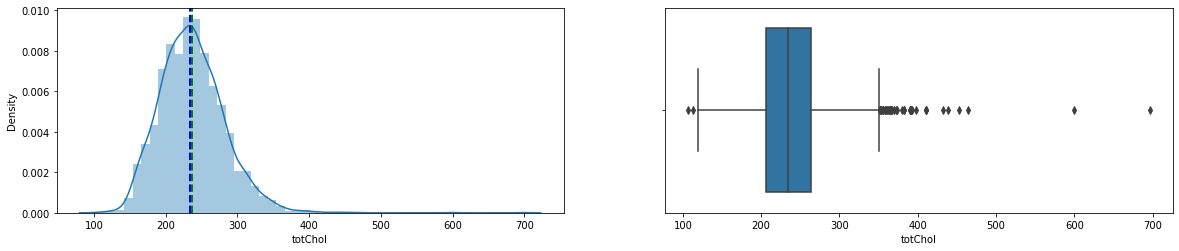

In [ ]:
# Plot the Data distribution chart for column
dist_chart(df['totChol'])

**Observation**
- From the chart, it's observed that Data is normally distributed 
- Mean and median values are close to each other
- From the box plot we can see that there are some outliers in data so for the safe side we'll replace null values with median

In [ ]:
df['totChol'].median()

234.0

In [ ]:
# Fill the null values with median
df['totChol'].fillna(df['totChol'].median(),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['totChol'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### BMI

In [ ]:
df['BMI'].unique()

array([  nan, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


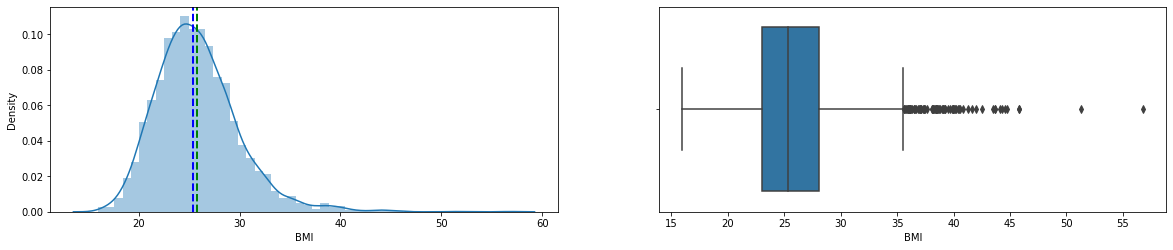

In [ ]:
# Plot the Data distribution chart for column
dist_chart(df['BMI'])

**Observation**
- From the chart, it's observed that Data is normally distributed 
- Mean and median values are close to each other
- From the box plot we can see that there are many outliers in data so we'll replace null values with median

In [ ]:
# Fill the null values with median
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['BMI'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### glucose

In [ ]:
#Find the unique values in columns
df['glucose'].unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


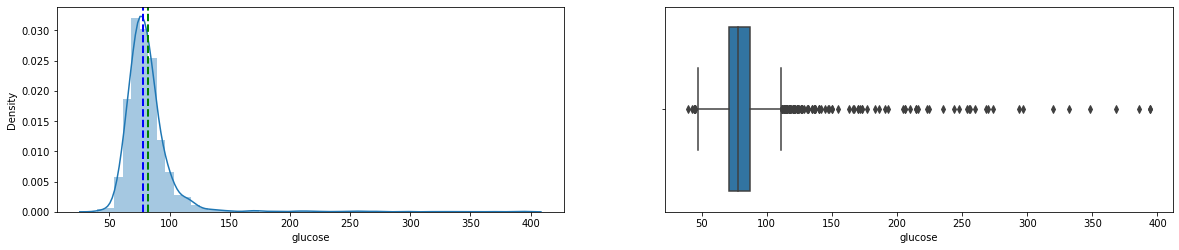

In [ ]:
# Plot the Data distribution chart for column
dist_chart(df['glucose'])

**Observation**
- From the chart, it's observed that Data chart is positively skewed
- From the box plot we can see that there are many outliers in data so we'll replace null values with median

In [ ]:
# Fill the null values with median
df['glucose'].fillna(df['glucose'].median(),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['glucose'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### heartRate

In [ ]:
#Find the unique values in columns
df['heartRate'].unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


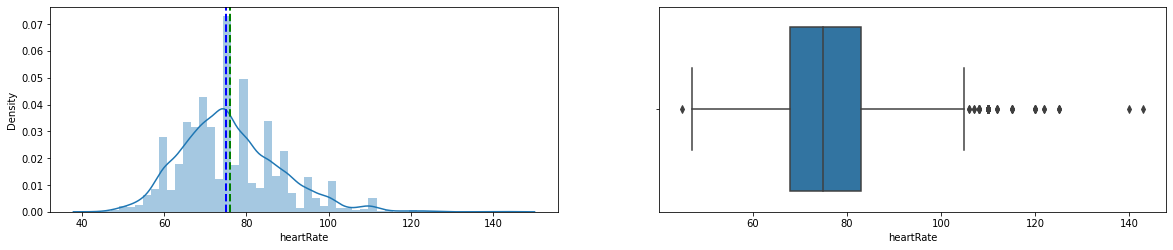

In [ ]:
# Plot the Data distribution chart for column
dist_chart(df['heartRate'])

**Observation**
- From the chart, it's observed that Data chart is somewhat positively skewed
- From the box plot we can see that there are som outliers in data so we'll replace null values with median (There is only one null filed so it will not make effect much)

In [ ]:
# Fill the null values with median
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['heartRate'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### Let's verify there is no column with null values

In [ ]:
# Let's checke the null values for all the columns
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Let's Start Our EDA

In [ ]:
#Define Function
def Catergory_Analysis(z):
  print('***Total unique values contain by column***')
  display(df[z].unique())
  y=df.groupby(z).agg({'age':'count', 'TenYearCHD': 'sum'}).reset_index().rename(columns={'age':'Total_Patient','TenYearCHD':'TenYearCHD_Patient'})
  y['CHD_Risk(%)']=round(y['TenYearCHD_Patient']/y['Total_Patient']*100,2)
  y['No_Risk(%)']=round((y['Total_Patient']-y['TenYearCHD_Patient'])/y['Total_Patient']*100,2)
  print(f'\n ***{z} Analysis Table*** \n')
  display(y)
  print('\n ***Plot Percentage Chart*** \n')
  #display(y[[z,'risk per']])
  plt.figure(figsize = (20,40))
  y.plot.bar(x=z,y=['CHD_Risk(%)','No_Risk(%)'])

In [ ]:
def conti_Analysis(c):
  d=df.groupby(c)['TenYearCHD'].sum().reset_index().sort_values(by='TenYearCHD',ascending=False)
  plt.figure(figsize = (20,5))
  sns.lineplot(data=d,x=c,y='TenYearCHD')
  plt.show()


## Gender wise EDA


***Total unique values contain by column***


array(['F', 'M'], dtype=object)


 ***sex Analysis Table*** 



,sex,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,F,1923,239,12.43,87.57
1,M,1467,272,18.54,81.46



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

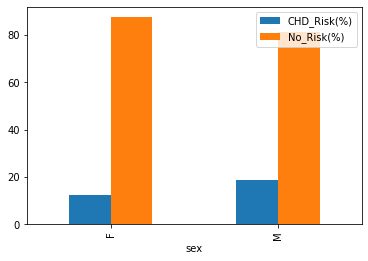

In [ ]:
#Call Analysis function for 'sex' variable
Catergory_Analysis('sex')

## Age wise Analysis

## Smoker wise Analysis

total unique values contain by column


array(['YES', 'NO'], dtype=object)


 ***is_smoking Analysis Table*** 



,is_smoking,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,NO,1703,236,13.86,86.14
1,YES,1687,275,16.30,83.70



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

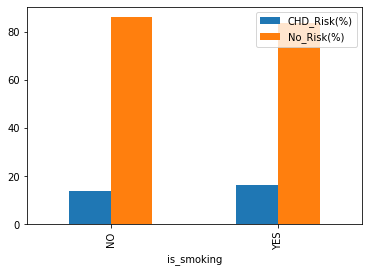

In [ ]:
#Call Analysis function for 'is_smoking' variable
Catergory_Analysis('is_smoking')

## diabetes wise Analysis

total unique values contain by column


array([0, 1])


 ***diabetes Analysis Table*** 



,diabetes,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,3303,478,14.47,85.53
1,1,87,33,37.93,62.07



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

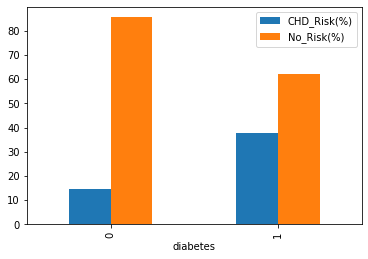

In [ ]:
#Call Analysis function for 'diabetes' variable
Catergory_Analysis('diabetes')

## BPMeds wise Analysis

***Total unique values contain by column***


array([0., 1.])


 ***BPMeds Analysis Table*** 



,BPMeds,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0.0,3290,478,14.53,85.47
1,1.0,100,33,33.00,67.00



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

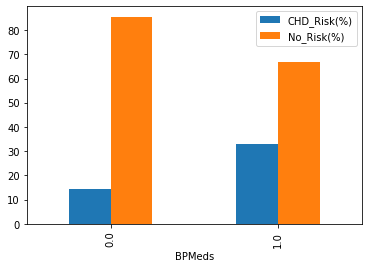

In [ ]:
#Call Analysis function for 'BPMeds' variable
Catergory_Analysis('BPMeds')

## prevalentStroke wise Analysis

***Total unique values contain by column***


array([0, 1])


 ***prevalentStroke Analysis Table*** 



,prevalentStroke,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,3368,501,14.88,85.12
1,1,22,10,45.45,54.55



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

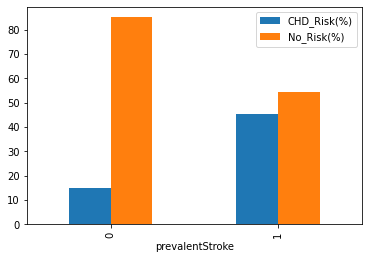

In [ ]:
#Call Analysis function for 'prevalentStroke' variable
Catergory_Analysis('prevalentStroke')

# prevalentHyp wise analysis variable

***Total unique values contain by column***


array([0, 1])


 ***prevalentHyp Analysis Table*** 



,prevalentHyp,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,2321,256,11.03,88.97
1,1,1069,255,23.85,76.15



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

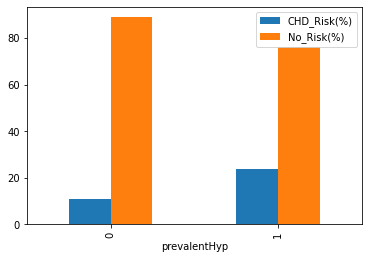

In [ ]:
#Call Analysis function for 'prevalentStroke' variable
Catergory_Analysis('prevalentHyp')

## diabetes wise analysis variable

***Total unique values contain by column***


array([0, 1])


 ***diabetes Analysis Table*** 



,diabetes,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,3303,478,14.47,85.53
1,1,87,33,37.93,62.07



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

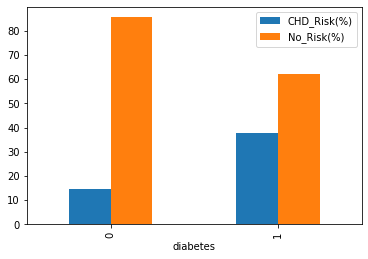

In [ ]:
#Call Analysis function for 'diabetes' variable
Catergory_Analysis('diabetes')

In [ ]:
Age_wise=df.groupby('age')['TenYearCHD'].mean().reset_index().sort_values(by='TenYearCHD',ascending=False)
Age_wise

In [ ]:
plt.figure(figsize = (20,5))
sns.lineplot(data=Age_wise,x='age',y='TenYearCHD')
plt.show()

In [133]:
df.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,...,is_smoking_NO,is_smoking_YES,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,64,3.0,221.0,148.0,85.0,25.38,90.0,80.0,1,1,...,0,1,1,0,1,0,1,0,1,0
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,...,1,0,1,0,1,0,0,1,1,0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,...,0,1,1,0,1,0,1,0,1,0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,...,0,1,1,0,1,0,0,1,1,0
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,...,0,1,1,0,1,0,1,0,1,0


In [137]:
df.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'TenYearCHD', 'sex_F', 'sex_M', 'is_smoking_NO',
       'is_smoking_YES', 'BPMeds_0.0', 'BPMeds_1.0', 'prevalentStroke_0',
       'prevalentStroke_1', 'prevalentHyp_0', 'prevalentHyp_1', 'diabetes_0',
       'diabetes_1'],
      dtype='object')

In [132]:
df=pd.get_dummies(df,columns=['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes'])

In [139]:
x =df.drop(columns=['TenYearCHD'])
y =df['TenYearCHD']

In [140]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [142]:
X_train,x_test,Y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.2,random_state=0)

In [145]:
def get_metrics(Y_train,y_train_pred,y_test,y_test_pred):
  
  
  train_accuracy=accuracy_score(Y_train, y_train_pred)
  train_precision = precision_score(Y_train, y_train_pred)
  train_recall = recall_score(Y_train, y_train_pred)
  train_f1 = f1_score(Y_train, y_train_pred)
  train_roc = roc_auc_score(Y_train, y_train_pred)
    
  print('**** Train Dataset Score ****')
  print('train_accuracy {}'.format(train_accuracy))
  print('train_precision is {}'.format(train_precision))
  print('train_recall is {}'.format(train_recall))
  print('train_f1 is {}'.format(train_f1))
  print('train_roc is {}'.format(train_roc))
  
 
  test_accuracy=accuracy_score(y_test, y_test_pred)
  test_precision = precision_score(y_test, y_test_pred)
  test_recall = recall_score(y_test, y_test_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  test_roc = roc_auc_score(y_test, y_test_pred)

  print('\n**** Test Dataset Score ****')
  print('test_accuracy is {}'.format(test_accuracy))
  print('test_precision is {}'.format(test_precision))
  print('test_recall is {}'.format(test_recall))
  print('test_f1 is {}'.format(test_f1))
  print('test_roc is {}'.format(test_roc))

  print('\n**** Confusion Matrix on train set ****')
  cm = confusion_matrix(y_test, y_test_pred)
  print(cm)
  
  
  print('\n**** Plot ROC-AUC Curve ****')
  plt.figure(figsize=(20,6))
  plt.plot((y_test_pred**2)[:100])
  plt.plot(np.array(y_test**2)[:100])
  plt.legend(["Predicted","Actual"])
  plt.show()


  fpr, tpr, _ = roc_curve(y_test, y_test_pred)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

  return test_accuracy,test_precision,test_recall,test_f1,test_roc

In [144]:
score_board={}